# 1. Latar Belakang

AIR BnB adalah sebuah perusahaan yang berfokus pada layanan daring penyewaan properti yang memungkinkan pengguna mendaftarkan atau menyewa properti untuk digunakan sementara (dalam jangka waktu pendek). Harga sewanya ditetapkan oleh pemilik properti. Airbnb menerima sebagian tarif jasa pembukuan dari tamu dan tuan rumah.

AirBnB Cabng Bangkok - Thailand, telah merekrut seorang Data Scientist untuk menganalisis masalah yang ada pada aplikasi online mereka melalui data listing Bangkok. Informasi ini akan dipergunakan oleh CMO (Chief Marketing Officer) untuk meningkatkan kualitas dan peringkat (review) aplikasi, mampu melihat permasalahan dalam penggunaan aplikasi, dan merancang strategi pemasaran yang akan meningkatkan daya tarik pengguna (calon penyewa) untuk melilih berbagai jenis properti dalam aplikasi AirBnB di Bangkok. 

### 1.1. Pernyataan Masalah
Perusahaan ingin mengetahui **faktor-faktor apa saja yang bisa diperbaiki di aplikasi AirBnB untuk meningkatkan kenyamanan atau kepuasan pengalaman calon penyewa properti di AirBnB kedepannya**. Informasi ini akan membantu perusahaan untuk meningkatkan kenyamanan pengalaman penyewa dalammenggunakan aplikasi AirBnB, dengan begitu dapat meningkatkan peringkat (rating) aplikasi itu sendiri. 

Sebagai seorang *data scientist*, kita akan mencoba menjawab pertanyaan berikut:

**Apa hal-hal yang dapat dilakukan untuk meningkatkan kepuasan pelanggan dalam penggunaan aplikasi AirBnB di Bangkok?**

- Following question: Tipe ruangan/properti apa yang paling banyak terlibat dalam faktor-faktor tersebut?

### 1.2. Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data AirBnB Listings Bangkok yang sudah dikumpulkan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1Kagt-IMGruvyBV3tH6HYa721JK-TN-56/view?usp=drive_link). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

C:\Users\grett\AppData\Local\Temp\ipykernel_20812\1377730622.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Dataset ini berisi informasi terkait nama dan tipe ruangan yang disewakan, geografis, ID penyewa, dan lainnya. Ada 17 kolom di dalam dataset AirBnB Listing Bangkok, yaitu:  

 * Unnamed: Nomor urut data
 * id: nomor identitas listing AirBnB 
 * name: Nama listing / properti
 * host_id: nomor identitas pengguna atau penyewa  
 * host_name: nama penyewa properti 
 * neighbourhood: Wilayah tersebut di-geocode menggunakan lintang dan bujur terhadap lingkungan sebagaimana yang ditentukan oleh shapefiles digital terbuka atau publik. 
 * latitude: proyeksi latitude
 * longitude: proyeksi longitude
 * room_type: jenis ruangan yang disewakan, seperti: Entire home/apartment, private room, shared room, hotel  
 * price: harga penyewaan properti per malam
 * minimum_nights: minimum penyewaan properti (satuan: per malam)
 * number_of_reviews: jumlah review yang didapat properti tersebut
 * last_review: terakhir kali properti tersebut diberi review
 * reviews_per_month: jumlah review yang dimiliki property tersebut dalam satu bulan
 * calculated_host_listings_count: Jumlah penyewaan yang dimiliki oleh pemilik dalam perolehan data saat ini di geografi kota/wilayah.
 * availability_365: Ketersediaan_x. Kalender menentukan ketersediaan daftar x hari ke depan. Perlu diperhatikan bahwa sebuah daftar dapat tersedia karena telah dipesan oleh tamu atau diblokir oleh tuan rumah.
 * number_of_reviews_ltm: Jumlah ulasan yang dimiliki oleh properti tersebut (dalam 12 bulan terakhir).


Berikut 5 baris teratas dan terbawah dari dataset AirBnB Listing Bangkok.

In [2]:
df = pd.read_csv("C:/.GRETTY/GERMANY/11. DS and ML/4. Capston Project/Capstone Project Module 2/Original - Airbnb Listings Bangkok.csv")
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Dari tampilan data diatas dan tujuan analisi, dapat diasumsikan bahwa analisa dalam kasus ini akan dilakukan secara implisit.

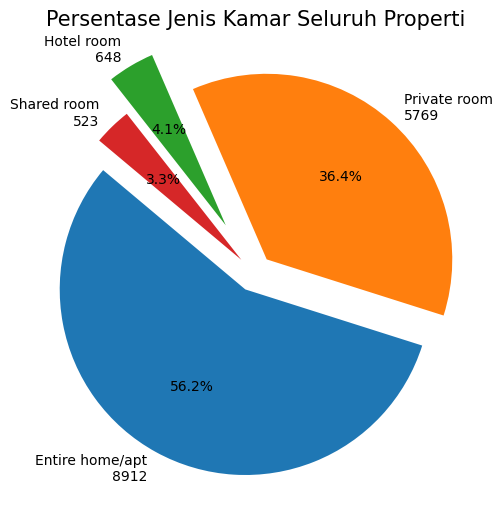

In [83]:
# Menghitung jumlah properti berdasarkan room_type
room_type_counts = df['room_type'].value_counts()

# Membuat label untuk pie chart
explode_1 = (0.1, 0.1, 0.3, 0.1)
labels = [f"{room_type}\n{count}" for room_type, count in zip(room_type_counts.index, room_type_counts)]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(room_type_counts, labels=labels, autopct='%1.1f%%', explode=explode_1, startangle=140)
plt.title('Persentase Jenis Kamar Seluruh Properti', size=15)
plt.axis('equal')
plt.show()

# 2. Pemahaman Data dan Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi keseluruha dari dataset yang kita punya.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

In [4]:
# Menghaspus kolom Unnamed:0 karena kolom tersebut sama dengan index
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6]:
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
1,name,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


### 2.1. Missing Value

In [7]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Terdapat 1 listing yang tidak memiliki host_name.
Berikutnya dilakukan pengecekan untuk baris tersebut, untuk menentukan tindakan apa yang harus dilakukan dengan baris tersebut.


In [8]:
# Memperlihatkan baris dengan nilai kosong dalam kolom 'host_name'
baris_kosong = df[df['host_name'].isnull()]

print("Baris dengan nilai kosong dalam kolom 'host_name':")
print(baris_kosong)

Baris dengan nilai kosong dalam kolom 'host_name':
            id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
3571  100.63769  Private room   1399               3                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
3571  2017-07-29               0.02                               1   

      availability_365  number_of_reviews_ltm  
3571               365                      0  


In [9]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

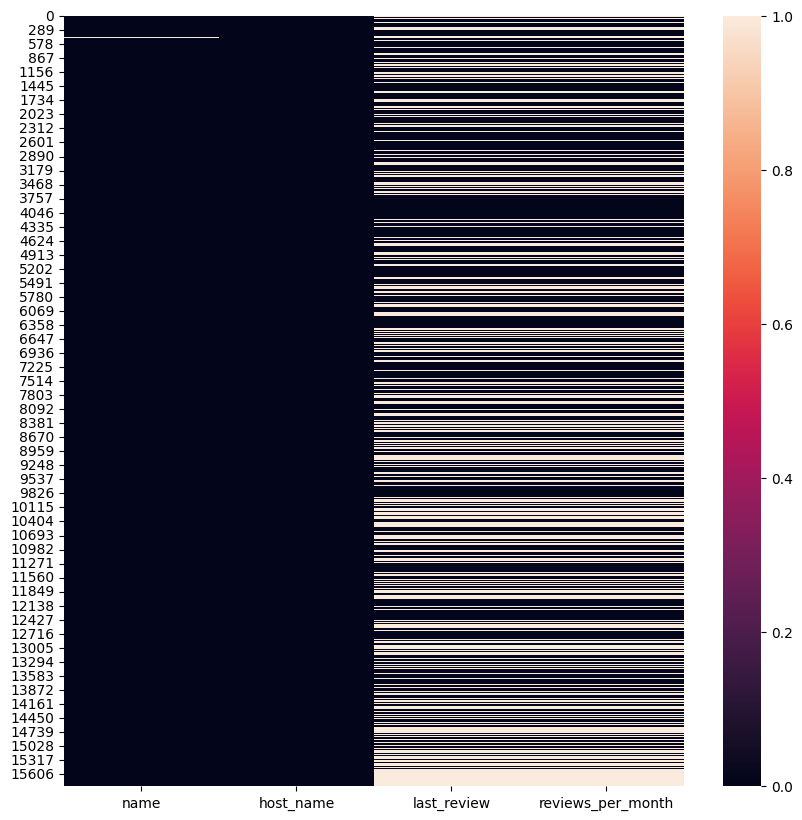

In [10]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Secara garis besar:  
* *missing value* di kolom `name` dan `host_name`memiliki proporsi yang cukup rendah (<6%).
* missing value* di kolom `last_review` dan `reviews_per_month` memiliki proporsi yang cukup tinggi (>35%).
* *missing value* di kolom `last_review` dan `reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka data di `reviews_per_month` juga kosong.  


* Dalam kasus ini, menghapus data yang memiliki missing value tidak disarankan, terutama untuk kolom `last_review` dan `reviews_per_month`, karena jumlah missing value yang tergolong cukup tinggi (>35%) dan untuk kolom `name`, kemungkinan anomali ini akan digunakan untuk analisis berikutnya. Sedangkan untuk kolom `host_name` meskipun jumlah missing valuenya kecil, kita tidak akan mengahpusnya karena akan tetap berguna untuk analisa berikutnya.


In [11]:
# # Menghapus baris dengan nilai kosong dalam kolom 'host_name'
# df = df.dropna(subset=['host_name'])

Menampilkan data yang memiliki nilai NaN pada kolom `Name` untuk melihat apakah ada hal lain yang dapat dianalisa dari missing value tersebut.

In [12]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


### 2.2. Duplikat
Pengecekan duplicate dilakukan pertama tama berdasarkan berdasarkan pada kolom longitude dan latitude dan neighbourhood untuk memeriksa apakah ada 1 properti yang terdaftar sebagai 2 listing yang pada daerah atau lokasi yang sama.

Pengecekan duplikasi dilakukan 2 kali untuk 2 kelompok katagori yang berbeda
1. Kesamaan data berdasarkan nama daerahnya dengan kolom 'name', 'room_type', 'host_id', 'host_name', 'price', 'neighbourhood'
2. Kesamaan data berdasarkan titik lokasi dengan kolom 'longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'.


Hal ini dilakukan karena besar kemungkinan atau dapat diduga bahwa properti yang terdaftar untuk disewakan adalah properti yang sama.

In [59]:
# Berdasarkan nama daerah (neighbourhood)
df_duplicate = df[df.duplicated(subset=['name', 'room_type', 'host_id', 'host_name', 'price', 'neighbourhood'], keep=False)]
display(len(df_duplicate))
display(df_duplicate)

758

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_year,indikasi_fake_review
288,1585084,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736160,100.572240,Entire home/apt,9999,2,46,2019-02-26,0.43,53,356,0,2019,7
294,2682899,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736100,100.570400,Entire home/apt,9999,2,25,2022-12-07,0.24,53,358,2,2022,28
317,3638924,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.737570,100.569940,Entire home/apt,9999,2,24,2022-12-22,0.24,53,359,2,2022,29
486,4639962,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.733130,100.562590,Private room,4871,1,27,2022-07-11,0.28,12,364,1,2022,-15
551,4753611,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736650,100.569830,Entire home/apt,9999,2,19,2017-05-29,0.20,53,360,0,2017,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15845,790458614980542576,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.754496,100.540597,Private room,1443,1,0,NaN,NaN,14,365,0,0,14
15846,790460236485689124,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.754724,100.539638,Private room,1443,1,0,NaN,NaN,14,365,0,0,14
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0,0,14
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0,0,14


In [14]:
# Berdasarkan titik lokasi (longitude & latitude)
df_duplicate = df[df.duplicated(subset=['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'], keep=False)]
display(len(df_duplicate))
display(df_duplicate)

94

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
486,4639962,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.733130,100.562590,Private room,4871,1,27,2022-07-11,0.28,12,364,1
1162,7717620,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.733130,100.562590,Private room,4871,1,20,2019-08-08,0.30,12,364,0
2119,13777582,"Studio with Zen garden view (30sqm), LUXX Silom",68154488,Dusadee,Bang Rak,13.726330,100.525310,Hotel room,1777,1,1,2017-03-18,0.01,62,271,0
3329,18396802,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.739370,100.555210,Entire home/apt,2470,2,63,2022-01-14,0.93,13,325,1
3473,19000129,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.739370,100.555210,Entire home/apt,2470,2,71,2022-12-26,1.06,13,343,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15784,787296571117687159,2 Beds Thong lor/Ekkamai/Nana/Swimming pool,485413319,Yang,Khlong Toei,13.722669,100.576863,Entire home/apt,2304,1,0,NaN,NaN,4,356,0
15806,789484901156712444,"50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym",472715937,Kotcharat,Bang Sue,13.828505,100.527433,Entire home/apt,560,12,0,NaN,NaN,8,363,0
15818,789868292624157017,曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费,227771817,MeetU,Sathon,13.710777,100.519891,Entire home/apt,1532,1,0,NaN,NaN,6,344,0
15829,790278230325843023,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,NaN,NaN,14,360,0


Terdapat 758 properti memiliki duplikasi data satu dengan yang lain berdasarkan daerah dan katagori (kolom) lainnya dan 94 properti yang memiliki duplikasi data satu dengan yang lain berdasarkan titik lokasinya dan katagori (kolom), seperti: lokasi, nama properti, nama pemilik properti, harga, dan jenis ruangan. Hal ini dapat membingungkan pengguna dan berindikasi 1 properti terdaftar dengan 2 id yang berbeda.

### 2.3. Pemetaan Data / Permasalahan
**Pemetaan data yang (mungkin) bisa menjadi issue:**

##### 1. Terdapat nilai **0, <100 Bath, >25.000 Bath** pada kolom `price`, yang dapat menimbukkan kebingungan calon penyewa properti.

In [62]:
# Menampilkan data dengan nilai sama dengan 0 pada kolom 'price'
data_0 = len(df[(df['price'] == 0)])

# Menampilkan data dengan nilai antara 1 dan 100 pada kolom 'price'
data_1_to_100 = len(df[(df['price'] > 0) & (df['price'] < 100)])

# Menampilkan data dengan nilai lebih besar dari 25.000 pada kolom 'price'
data_gt_25000 = len(df[df['price'] > 25000])

print(f"Data dengan nilai sama dengan 0 pada kolom 'price':{data_0}")

print(f"Data dengan nilai antara 0 dan 100 pada kolom 'price':{data_1_to_100}")

print(f"Data dengan nilai lebih besar dari 25.000 pada kolom 'price':{data_gt_25000}")

Data dengan nilai sama dengan 0 pada kolom 'price':0
Data dengan nilai antara 0 dan 100 pada kolom 'price':0
Data dengan nilai lebih besar dari 25.000 pada kolom 'price':103


- Terdapat 103 properti yang overprice. Berdasarkan hal berikut, akan dilakukan analisa lebih lanjut pada bagian analisi terhadap properti-properti tersebut.

In [16]:
# # Menghapus baris dengan nilai 0 dalam kolom 'price'
# df = df[df['price'] != 0]

In [ ]:
# # Menampilkan data dengan nilai sama dengan 0 pada kolom 'price'
# data_0 = len(df[(df['price'] == 0)])
# print(f"Data dengan nilai sama dengan 0 pada kolom 'price':{data_0}")

##### 2. Nilai `minimum_nights` yang lebih dari 100 hari (artinya properti tidak disewakan untuk jangka pendek).

In [64]:
# Menampilkan data dengan nilailebih dari 100 (hari) pada kolom 'minimum_nights'
data_gt_100days = len(df[(df['minimum_nights'] > 100)])
print(f"jumlah properti yang memiliki minimum stay lebih dari 100 (hari):{data_gt_100days}")

jumlah properti yang memiliki minimum stay lebih dari 100 (hari):428


##### 3. Nilai 0 pada kolom`availability_365` (properti tidak dapat disewa sama sekali sepanjang tahun)

In [65]:
# Menampilkan data dengan nilai sama dengan 0 pada kolom 'availability_365'
data_0_avalability = len(df[(df['availability_365'] == 0)])
print(f"jumlah properti yang tidak dapat disewakan sepanjang tahun (avalability = 0): {data_0_avalability}")

jumlah properti yang tidak dapat disewakan sepanjang tahun (avalability = 0): 856


##### 4. Property yang memiliki `nama`  yang dituliskan tidak hanya dengan alfabet Latin (sulit untuk dipahami oleh calon penyewa)

Pengecekan terhadap nama properti dilakukan 2 kali untuk 2 katagori yang berbeda:
1. Name properti yang menggunakan bukan karakter Latin lebih dari 5 karakter
2. Nama properti yang mengandung tidak hanya karakter Latin (1 atau lebih Karakter)

In [20]:
import re

# Membuat pola ekspresi reguler untuk mencocokkan 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter
# pola = re.compile(r'[^\u0000-\u007F]+')
pola = re.compile(r'[^\u0000-\u007F]{5,}')

# Memeriksa data pada kolom 'name' yang tidak memenuhi pola
nama_non_latin_5kar = len(df[df['name'].str.contains(pola, na=False)])
nama_non_latin = df.loc[df['name'].str.contains(pola, na=False), ['name']]

print(f"Jumlah data pada kolom 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter:{nama_non_latin_5kar}")
print("\n")
print(nama_non_latin)

Jumlah data pada kolom 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter:1650


                                                    name
31                          กรองทองแมนชั่น (ลาดพร้าว 81)
46     ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs...
88                                 เฮ้าส์โหมด House Mode
186                                     วรภาดา น้อยพันธ์
275    บ้านใกล้สุวรรณภูมิ ตรงข้ามแอร์พอร์ตลิ้งบ้านทับ...
...                                                  ...
15799                       曼谷市中心豪华公寓 40层+高层城市景观 MRT600米
15800                    20 曼谷高端公寓gymwifi 超大泳池Terminal21
15814      高空花园健身房泳池桑拿豪华公寓＋市中双轨BTSMRT＋Asok NanaSoicowboy
15818  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街

[1650 rows x 1 columns]


In [21]:
# Membuat pola ekspresi reguler untuk mencocokkan nama yang mengandung tidak hanya karakter Latin
pola = re.compile(r'[^\u0000-\u007F]+')

# Memeriksa data pada kolom 'name' yang tidak memenuhi pola
jumlah_nama_non_latin = len(df[df['name'].str.contains(pola, na=False)])
nama_non_latin = df.loc[df['name'].str.contains(pola, na=False), ['name']]

print(f"Jumlah data pada kolom 'name' yang menggunakan tidak hanya karakter Latin:{jumlah_nama_non_latin}")
print("\n")
print(nama_non_latin)

Jumlah data pada kolom 'name' yang menggunakan tidak hanya karakter Latin:2779


                                                    name
31                          กรองทองแมนชั่น (ลาดพร้าว 81)
41           ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀
46     ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs...
47                  ☞Downtown Central Studio-Bangkok MRT
53         ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡
...                                                  ...
15814      高空花园健身房泳池桑拿豪华公寓＋市中双轨BTSMRT＋Asok NanaSoicowboy
15818  曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费
15819       Bkk/BTS Surasak/温馨loft公寓5/免费泳池/健身房/WIFI/免费停车
15835  *Best Pool View*5 Min​ Walk to MRT*Wifi*Washma...
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街

[2779 rows x 1 columns]


# 3. Analisis

Berdasarkan pemahaman data diatas, kita sudah bisa melihat sekilas ada beberapa permasalahan dalam aplikasi AirBnB di bangkok.

### Statistik Analisis

Analisis Statistik coba dilakukan terlebih dahulu untuk melihat hubungan antar data numerik.

In [81]:
from scipy import stats

#Melakukan test normalitas
statistic, p_value = stats.shapiro(df['price'])
print(f'Statistict Value: {statistic}, nilai p_value: {p_value}')

Statistict Value: 0.04441980054349737, nilai p_value: 1.4522815975604945e-127


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15852 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15852 non-null  int64  
 1   name                            15844 non-null  object 
 2   host_id                         15852 non-null  int64  
 3   host_name                       15852 non-null  object 
 4   neighbourhood                   15852 non-null  object 
 5   latitude                        15852 non-null  float64
 6   longitude                       15852 non-null  float64
 7   room_type                       15852 non-null  object 
 8   price                           15852 non-null  int64  
 9   minimum_nights                  15852 non-null  int64  
 10  number_of_reviews               15852 non-null  int64  
 11  last_review                     10063 non-null  object 
 12  reviews_per_month               10063

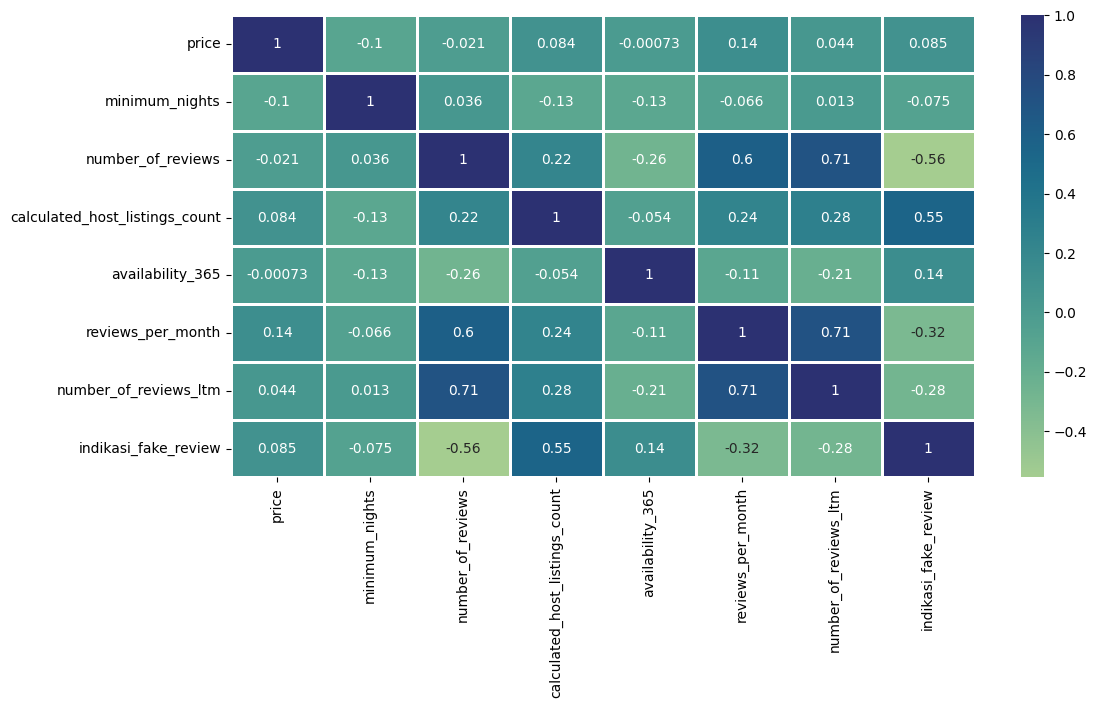

In [82]:
# Melakukan pengecekan korelasi

# Memilih kolom numerik
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'reviews_per_month', 'number_of_reviews_ltm', 'indikasi_fake_review']
numeric_data = df[numeric_columns]

# Menghitung matriks korelasi
corr = numeric_data.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, linewidth=2, cmap="crest")
plt.show()

Setelah memeriksa nilai korelasi dari jumlah ulasan dengan kolom-kolom lainnya, ternyata yang memiliki korelasi tinggi hanya terkait ulasan per bulan (0,60) dan jumlah ulasan dalam 1 tahun (0,71). Selain itu, tidak ada korelasi signifikan lainnya. Itulah mengapa mengetahui korelasi menggunakan metode statistik mungkin tidak berlaku. Oleh karena itu, analisis selanjutnya akan berfokus pada menemukan korelasi "jumlah ulasan" berdasarkan pengetahuan domain.

### Implisit Analisis

#### 3.1. Analisa Missing Value
Berdasarkan dari pemeriksaan Missing Value (point 2.1), terdapat 8 Properti yang tidak memiliki nama. Hal ini seharusnya tidak terjadi jika Aplikasi AirBnB membuat kolom pengisian nama properti (saat pemiliki properti ingin mendaftarkan propertinya untuk disewakan) sebagai kolom yang harus diisi/tidak boleh kosong.
Hal ini juga dapat membingungkan pengguna.

Pemeriksaan lebih lanjut dilakukan untuk melihat jenis propertinya.

In [22]:
# Menampilkan data yang memiliki nilai NaN pada kolom `Name`
data_name_null = df[df['name'].isna()][['id', 'name', 'room_type', 'number_of_reviews', 'price', 'calculated_host_listings_count']]
data_name_null

,id,name,room_type,number_of_reviews,price,calculated_host_listings_count
439,4549768,NaN,Private room,0,1080,1
544,4720818,NaN,Private room,0,1200,1
572,4245018,NaN,Private room,0,1200,1
669,6148415,NaN,Entire home/apt,0,2424,1
1030,8055144,NaN,Private room,0,5000,1
1282,10000742,NaN,Private room,6,930,1
1594,10710165,NaN,Private room,0,1000,1
2075,13142743,NaN,Private room,2,850,3


Dari table diatas dapat dilihat 7 dari 8 properti yang tidak memiliki nama hanya disewa 1 kali.
Rendahnya rating penyewa terhadap properti tersebut bisa mengindikasi rendahnya jumlah penyewa terdapat properti tersebut. Tidak adanya nama properti dapat menurunkan tingkat kepercayaan untuk menyewakan properti tersebut, terutama jika dilihat harga properti yang disewakan juga tidak murah.

In [23]:
data_name=data_name_null.groupby('room_type').size()
data_name

room_type
Entire home/apt    1
Private room       7
dtype: int64

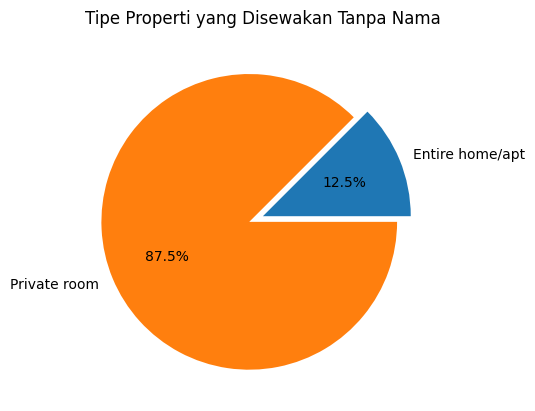

In [24]:
explode=[0.0,0.1]

plt.pie(data_name, labels=data_name.index, autopct='%1.1f%%',explode=explode)
plt.title('Tipe Properti yang Disewakan Tanpa Nama')
plt.show()

Dapat dilihat 87% dari properti adalah properti yang bentuknya 'private room'. 
AirBnB dapat lebih menghindari hal ini dengan memfokusan pendaftaran properti sebagai listing di aplikasi AirBnB yang bentuknya Private room/sharing bangunan dengan pemilik.

#### 3.2. Analisa Duplikasi
Berdasarkan hasil pemeriksaan duplikasi data (point 2.2), dapat diduga bahwa terdapat 758 properti (berdasarkan daerah) dan 94 properti (berdasarkan titik lokasi) yang memiliki duplikat data terdaftar pada aplikasi.

In [25]:
df_duplicate.groupby(['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'])[['id']].count()

id
longitude  latitude  name                                               room_type       host_id   host_name                     
100.497900 13.762790 NA BANGLAMPOO GUEST HOUSE                          Private room    87704107  Yui                          2
100.503600 13.788938 15days!New!Bang Phlat MRT 600m/swiming pool/gym    Entire home/apt 52161947  Noons                        2
                                                                                        201677068 Curry                        2
100.504680 13.757000 Vintage LOFT SUITE in Bangkok old town             Hotel room      214236911 Jason                        2
100.516920 13.719200 Silvio's Bistro                                    Private room    41512313  Silvio                       2
100.519891 13.710777 Sathon Luxury 2 br/China Town/Icon Siam            Entire home/apt 20133201  Willam                       2
                                                                                        264864968 Tricia                       3
                                                                                        344327171 Alice                        3
                     Sathon Luxury Loft/China Town/Icon Siam            Entire home/apt 276781306 Alex                         2
                     曼谷市中心loft公寓/近BTS/游泳池/健身房,近BTS,免费高速WIFI,帕蓬夜市14分钟可达  Entire home/apt 219984842 TTzahome                     2
                     曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费  Entire home/apt 227771817 MeetU                        3
100.523310 13.723330 Cozy Room/Private/(2pp)/BTS7Min/Silom/Sathorn/New  Hotel room      60049967  Note                         2
100.525310 13.726330 Studio with Zen garden view (30sqm), LUXX Silom    Hotel room      68154488  Dusadee                      2
100.526120 13.731819 New spacious 2BR 3PPL with pool&gym Silom &Sathorn Entire home/apt 480415786 Aaron                        2
100.527433 13.828505 50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym  Entire home/apt 472715937 Kotcharat                    2
                                                                                                  Kotcharat                    2
100.538220 13.753400 White House Hostel Deluxe Room Shared Bathroom     Hotel room      266898220 Piti                         2
100.539720 13.780780 ONLY 10 min walk BTS Ari / BAANNUENG @ari5[Suite]  Private room    183921210 First                        2
100.540777 13.756598 One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK/GYM Entire home/apt 201677068 Curry                        4
100.548159 13.720197 Budget Hotel in Center of Bangkok @HAP             Private room    476157531 Tachin                       2
100.549670 13.743800 Great price, 100m Short walk to BTS, Why stay far? Entire home/apt 95548084  Mod Apiluk                   2
100.555210 13.739370 Studio for 2PAX: 1-Min from BTS Nana               Entire home/apt 3773805   Danai And BicGy              2
100.555503 13.750300 30days! Sukhumvit NANA spacious 2BR 4PPL near BTS  Entire home/apt 201677068 Curry                        2
100.556320 13.740168 Family Room for 4 People                           Private room    340188343 Rachan                       2
100.562590 13.733130 Sukhumvit, 5 min walk to Sky Train Asoke Station   Private room    24021888  Maitria Hotel Sukhumvit 18   2
100.566340 13.809450 The Lux Ladprao 10                                 Private room    214932677 Visani                       2
                     The Lux Ladpraw 10                                 Private room    214932677 Visani                       2
100.568269 13.756184 Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    Entire home/apt 20133201  Willam                       2
100.568486 13.757097 Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    Entire home/apt 344327171 Alice                        2
100.569440 13.760440 Family Friendly Condo with Baby amenities提供婴儿床     Entire home/apt 12464021  Rebecca                      

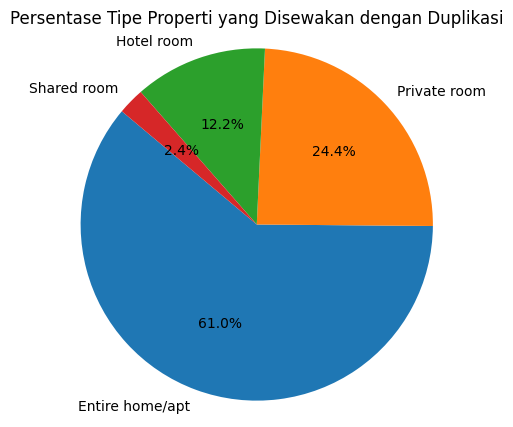

In [27]:
import matplotlib.pyplot as plt

# Menghitung jumlah duplikat berdasarkan kolom yang disebutkan
df_duplicate_count = df_duplicate.groupby(['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'])[['id']].count().reset_index()

# Menghitung persentase untuk setiap room_type
room_type_percentage = df_duplicate_count['room_type'].value_counts(normalize=True) * 100

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(room_type_percentage, labels=room_type_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Tipe Properti yang Disewakan dengan Duplikasi')
plt.axis('equal')  # Mengatur aspek lingkaran menjadi persegi agar terlihat seperti lingkaran
plt.show()

Permasalahan diatas memiliki kemungkinan bahwa lokasi berada pada gedung apartemen dan pemiliki properti memiliki lebih dari 1 apartemen yang ingin disweakan, tapi seharusnya pemilik membedakan nama properti untuk menghindari kebingungan dari calon penyewa. Hal ini dapat dihindari dengan membuat kolom pengisian nama properti (saat pemiliki properti ingin mendaftarkan propertinya untuk disewakan) tidak dapat diisi dengan nama yang sudah terdaftar (axis) sebulnya. Nama dapat dibuat seperti Username (unique name).
Hal ini juga dapat membingungkan pengguna.

Permasalahan diatas juga dapat menyebabkan konflik pemesanan jika ternyata properti-properti yang terdaftar secara duplikat adalah 1 properti yang sama, artinya ketika seseorang sudah memesan properti tertentu, dan orang lain mencoba memesan properti yang sama, aplikasi menunjukkan bahwa ada 2 (padahal hanya 1) properti yang sama tersedia untuk disewakan. Akibatnya, orang kedua mungkin secara keliru percaya bahwa properti masih tersedia untuk disewakan ketika orang lain sudah memesannya.

In [28]:
# Menemukan duplikat berdasarkan beberapa kolom tertentu
df_duplicate = df[df.duplicated(subset=['name', 'room_type', 'host_id', 'host_name', 'price', 'neighbourhood'], keep=False)]
display(len(df_duplicate))

758

In [29]:
# Menghitung jumlah duplikat dalam setiap kelompok
jumlah_duplikat_per_kelompok = df_duplicate.groupby(['name', 'room_type', 'host_id', 'host_name', 'price', 'neighbourhood']).size()

# Mengurutkan berdasarkan size terbesar
jumlah_duplikat_per_kelompok_sorted = jumlah_duplikat_per_kelompok.sort_values(ascending=False)

# Menampilkan jumlah duplikat per kelompok yang diurutkan
print("Jumlah kelompok:", len(jumlah_duplikat_per_kelompok_sorted))
print(jumlah_duplikat_per_kelompok_sorted)

Jumlah kelompok: 256
name                                                room_type        host_id    host_name   price  neighbourhood
30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P)  Entire home/apt  201677068  Curry       2527   Ratchathewi      22
New!  La Chada Night Market studio 2PPL near MRT    Entire home/apt  201677068  Curry       1000   Huai Khwang      20
New!  La Chada Night Market 1BR 2PPL near MRT       Entire home/apt  201677068  Curry       1057   Huai Khwang      18
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS  Entire home/apt  201677068  Curry       1466   Ratchathewi      14
14 Male Dormitory Room                              Shared room      228535635  Pornchai    550    Phra Nakhon      14
                                                                                                                    ..
Family Room for 4 People                            Private room     340188343  Rachan      2237   Vadhana           2
Family room with private bathroom

In [ ]:
# import matplotlib.pyplot as plt

# # Menghitung total id
# total_id = len(df['id'])

# # Data untuk bar chart
# data = [total_id, len(df_duplicate)]

# # Label untuk bar chart
# labels = ['Total Properti','Jumlah Duplikat']

# # Membuat bar chart
# plt.figure(figsize=(10, 6))
# bars = plt.bar(labels, data, color=['blue', 'red'])

# # Menambahkan label angka pada setiap bar chart
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

# plt.xlabel('Kategori')
# plt.ylabel('Jumlah')
# plt.title('Perbandingan Jumlah Duplikat Property terhadap Total Properti')
# plt.show()


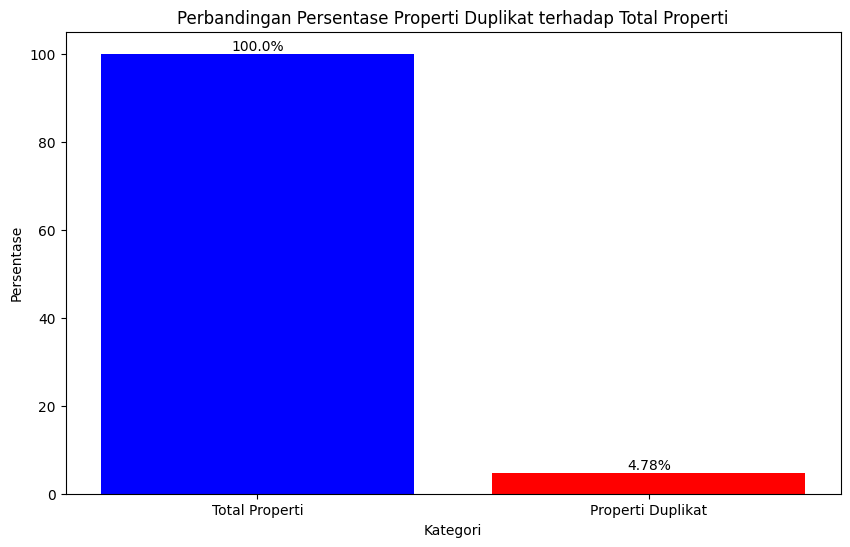

In [30]:
import matplotlib.pyplot as plt

# Menghitung total id
total_id = len(df['id'])

# Menghitung jumlah properti duplikat
total_duplicate = len(df_duplicate)

# Menghitung proporsi properti duplikat terhadap total properti
proporsi_duplicate = total_duplicate / total_id * 100

# Data untuk bar chart
data = [100, proporsi_duplicate]  # Menggunakan 100 untuk total properti dan proporsi_duplicate untuk properti duplikat

# Label untuk bar chart
labels = ['Total Properti','Properti Duplikat']

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, data, color=['blue', 'red'])

# Menambahkan label angka (persentase) pada setiap bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{round(yval, 2)}%', ha='center', va='bottom')

plt.xlabel('Kategori')
plt.ylabel('Persentase')
plt.title('Perbandingan Persentase Properti Duplikat terhadap Total Properti')
plt.show()


Terdapat banyak properti dengan nama pemilik, nama properti, harga dan area yang sama. Hal ini dapat menimbulkan kebingungan pada calon penyewa properti.

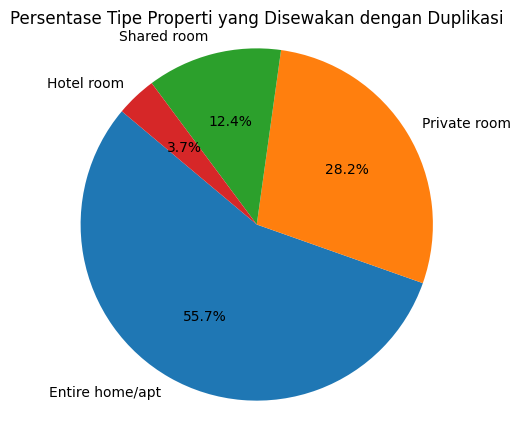

In [31]:
import matplotlib.pyplot as plt

# Menghitung jumlah duplikat berdasarkan kolom yang disebutkan
df_duplicate_count = df_duplicate.groupby(['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'])[['id']].count().reset_index()

# Menghitung persentase untuk setiap room_type
room_type_percentage = df_duplicate_count['room_type'].value_counts(normalize=True) * 100

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(room_type_percentage, labels=room_type_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Tipe Properti yang Disewakan dengan Duplikasi')
plt.axis('equal')  # Mengatur aspek lingkaran menjadi persegi agar terlihat seperti lingkaran
plt.show()

#### 3.3. Analisa Overprice
Berdasarkan hasil pemetaan permasalahan (point 2.3) ditemukan 103 properti yang harganya diatas 25.000 Bath. Dari sini akan dilakukan analisa lebih lanjut.

In [279]:
#df_duplicate.groupby(['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'])[['id']].count()

df_high_price = df[df['price'] > 25000][['neighbourhood', 'name', 'room_type', 'price', 'calculated_host_listings_count']]
df_high_price.groupby(['name', 'neighbourhood', 'room_type', 'price', 'calculated_host_listings_count'])[['name']].count()
# print(f"Data dengan nilai lebih besar dari 45.000 pada kolom 'price':{len(df_high_price)}")
# print(df_high_price.head())

df_grouped_sorted = df_high_price.sort_values(by='calculated_host_listings_count')
print(df_grouped_sorted.head())



     neighbourhood                                               name  \
6346     Yan na wa                                 Cote Maison rama 3   
4354   Khlong Toei  Trapezo Sukhumvit 16 - Minimum 1 Month -28,000...   
4691       Vadhana   2 Br 4ppl Trendy Area, Pool, WiFi, BTS, Shopping   
4819       Vadhana                              Modern Thong Lo House   
5061       Pra Wet  Detached House for rent in bangkok \n\n$1200/m...   

            room_type  price  calculated_host_listings_count  
6346  Entire home/apt  75000                               1  
4354  Entire home/apt  28000                               1  
4691  Entire home/apt  35005                               1  
4819     Private room  34631                               1  
5061     Private room  41557                               1  


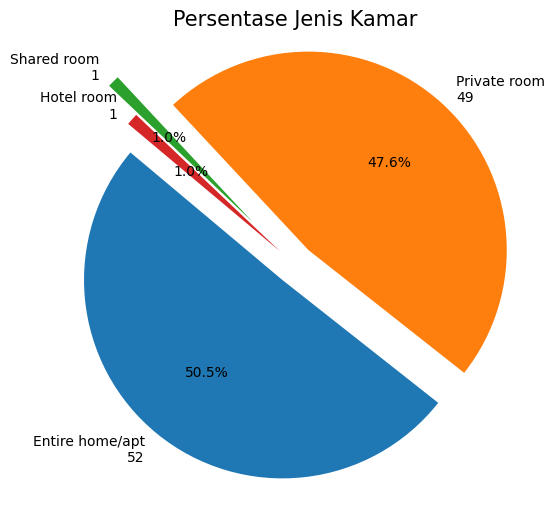

In [288]:
import matplotlib.pyplot as plt

# Menghitung jumlah properti berdasarkan room_type
room_type_counts = df_grouped_sorted['room_type'].value_counts()

# Membuat label untuk pie chart
explode_1 = (0.1, 0.1, 0.3, 0.1)
labels = [f"{room_type}\n{count}" for room_type, count in zip(room_type_counts.index, room_type_counts)]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(room_type_counts, labels=labels, autopct='%1.1f%%', explode=explode_1, startangle=140)
plt.title('Persentase Jenis Kamar', size=15)
plt.axis('equal')
plt.show()


In [ ]:
# import folium

# # Membuat peta
# m = folium.Map(location=[13.736717, 100.523186], zoom_start=11)  # Lokasi awal: Bangkok

# # Menambahkan marker untuk setiap properti dengan harga lebih dari 45000
# for index, row in df[df['price'] > 45000].iterrows():
#     folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# # Menampilkan peta
# m


In [36]:
import folium

# Membuat peta
m = folium.Map(location=[13.736717, 100.523186], zoom_start=11, tiles='CartoDB Positron', lang='en')

# Menambahkan marker untuk setiap properti dengan harga lebih dari 45000
for index, row in df[df['price'] > 45000].iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Menampilkan peta
m


Seperti terlihat pada peda, sebaran lokasi properti sebagian besar besar berada pada pusat kota bangkok. Harga yang tinggi bisa jadi karena faktor lokasi, meskipun demikian 25.000 bath per malam terlalu mahal terutama untuk tipe ruangan 'Private room'. Hal ini bisa jadi karena kesalahan input oleh pemilik properti. Tim AirBnB dapat melakukan evaluasi atas setiap properti yang didaftarkan sebelum 'approve' properti tersebut.

#### 3.4. Analisa Minimum Night
Dari pemeriksaan masalah sebelumnya, diketahui terdapat 428 properti yang memiliki persyaratan untuk menyewa properti lebih dari 100 hari (3 bulan), berdasarkan situs resmi mereka, AirBnB dapat disewakan bulanan dengan mengatur minimal stay max 28 hari.

Note: untuk beberapa negara max 90 hari.

In [66]:
# Menampilkan data dengan nilai lebih dari 100 (hari) pada kolom 'minimum_nights'
data_gt_100days = len(df[(df['minimum_nights'] > 100)])
print(f"data dengan nilai lebih dari 100 (hari) pada kolom 'minimum_nights':{data_gt_100days}")

data dengan nilai lebih dari 100 (hari) pada kolom 'minimum_nights':428


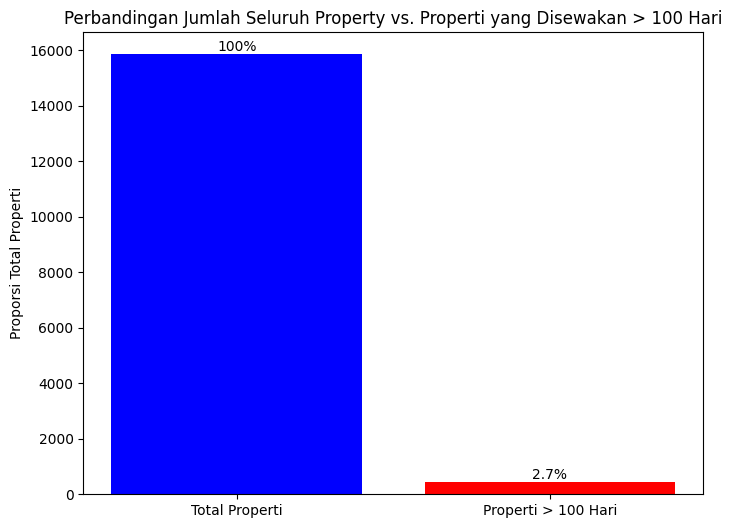

In [67]:
import matplotlib.pyplot as plt

# Menghitung proporsi 'properti > 100 hari' terhadap 'total properti'
proporsi_properti_lebih_dari_100_hari = (data_gt_100days / len(df)) * 100
proporsi_total_properti = 100

# Data
categories = ['Total Properti', 'Properti > 100 Hari']
values = [len(df), data_gt_100days]

prop_with_review = values[1] / values[0] * 100

# Membuat bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['blue', 'red'])

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == values[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.ylabel('Proporsi Total Properti')
plt.title('Perbandingan Jumlah Seluruh Property vs. Properti yang Disewakan > 100 Hari')
plt.show()



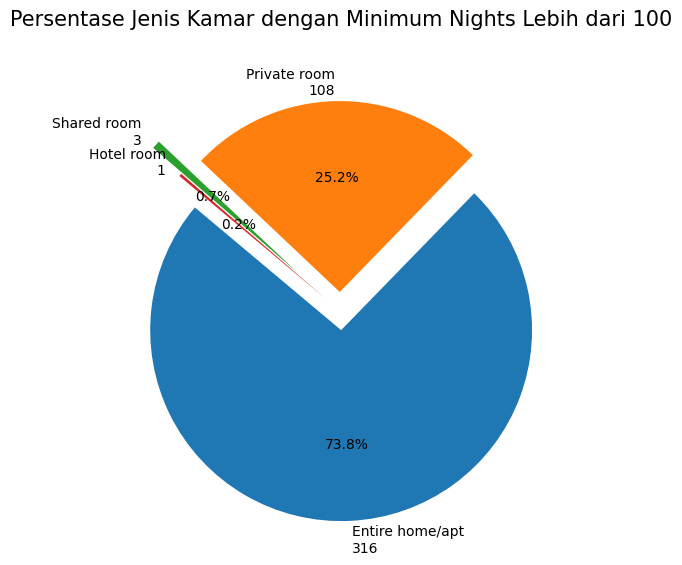

In [73]:
import matplotlib.pyplot as plt

# Membuat DataFrame baru dengan syarat minimum_nights lebih besar dari 100
data_gt_100days = df[df['minimum_nights'] > 100]

# Menghitung jumlah properti berdasarkan room_type
room_type_counts = data_gt_100days['room_type'].value_counts()

# Membuat label untuk pie chart
explode_1 = (0.1, 0.1, 0.3, 0.1)
labels = [f"{room_type}\n{count}" for room_type, count in zip(room_type_counts.index, room_type_counts)]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(room_type_counts, labels=labels, autopct='%1.1f%%', explode=explode_1, startangle=140)
plt.title('Persentase Jenis Kamar dengan Minimum Nights Lebih dari 100\n\n', size=15)
plt.axis('equal')
plt.show()


2,7% dari total properti harus disewa setidaknya 101 hari (lebih dari 3 bulan), dengan proporti tipe ruangan seperti terlihat pada pie chart diatas. Hal ini mengurangi opsi calon penyewa atau mengurangi kemungkinan properti untuk disewa.

#### 3.5. Analisa Available Night

Dari pemeriksaan masalah sebelumnya, diketahui terdapat 856 properti yang tidak memiliki ketersediaan hari/malam untuk disewakan sepanjang tahun (0), dengan kata lain properti tidak dapat disewa sama sekali. Hal ini bisa saja terjadi atas kesalahan input pemilik properti dan diatasi dengan memberlakukan minimum available night saat pemilik properti mendaftarkan properti mereka. Dengan demikian, calon penyewa memiliki lebih banyak pilihan. 

Analisa lebih lanjut dilakukan untuk melihat tipe ruangannya.

In [39]:
# # Mengonversi kolom 'last_review' ke tipe data datetime
# df['last_review_year'] = pd.to_datetime(df['last_review']).dt.year

# # Mengisi data NaN pada kolom `last_review_year` dengan 0.
# df['last_review_year'].fillna(0, inplace=True)

# # Mengubah nilai last_review_year menjadi tipe data interger
# df['last_review_year'] = df['last_review_year'].astype(int)

In [40]:
# # Menampilkan data dengan nilai sama dengan 0 pada kolom 'availability_365'
# data_0_avalability = len(df[(df['availability_365'] == 0)])
# print(f"Data dengan nilai sama dengan 0 pada kolom 'availability_365':{data_0_avalability}")

Data dengan nilai sama dengan 0 pada kolom 'availability_365':856


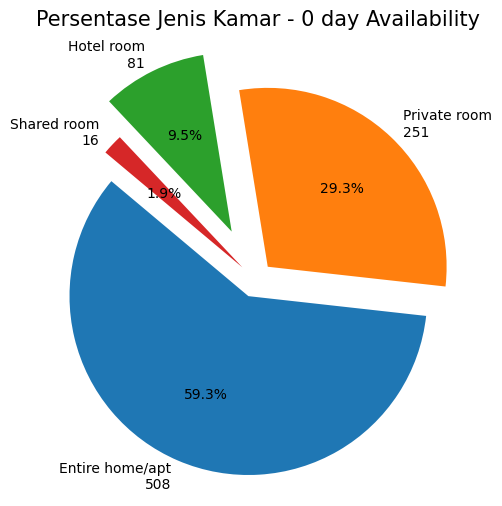

In [41]:
data_0_avalability = df[(df['availability_365'] == 0)]

# Menghitung jumlah properti berdasarkan room_type
room_type_counts = data_0_avalability['room_type'].value_counts()

# Membuat label untuk pie chart
explode_1 = (0.1, 0.1, 0.3, 0.1)
labels = [f"{room_type}\n{count}" for room_type, count in zip(room_type_counts.index, room_type_counts)]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(room_type_counts, labels=labels, autopct='%1.1f%%', explode=explode_1, startangle=140)
plt.title('Persentase Jenis Kamar - 0 day Availability', size=15)
plt.axis('equal')
plt.show()


#### 3.6. Analisa Nama Properti

In [42]:
import re

pola = re.compile(r'[^\u0000-\u007F]{5,}')

# Memeriksa data pada kolom 'name' yang tidak memenuhi pola
nama_non_latin_5kar = len(df[df['name'].str.contains(pola, na=False)])
nama_non_latin = df.loc[df['name'].str.contains(pola, na=False), ['name']]

print(f"Jumlah data pada kolom 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter:{nama_non_latin_5kar}")

Jumlah data pada kolom 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter:1650


In [43]:
# Membuat pola ekspresi reguler untuk mencocokkan nama yang mengandung tidak hanya karakter Latin
pola = re.compile(r'[^\u0000-\u007F]+')

# Memeriksa data pada kolom 'name' yang tidak memenuhi pola
jumlah_nama_non_latin = len(df[df['name'].str.contains(pola, na=False)])
nama_non_latin = df.loc[df['name'].str.contains(pola, na=False), ['name']]

print(f"Jumlah data pada kolom 'name' yang menggunakan tidak hanya karakter Latin:{jumlah_nama_non_latin}")

Jumlah data pada kolom 'name' yang menggunakan tidak hanya karakter Latin:2779


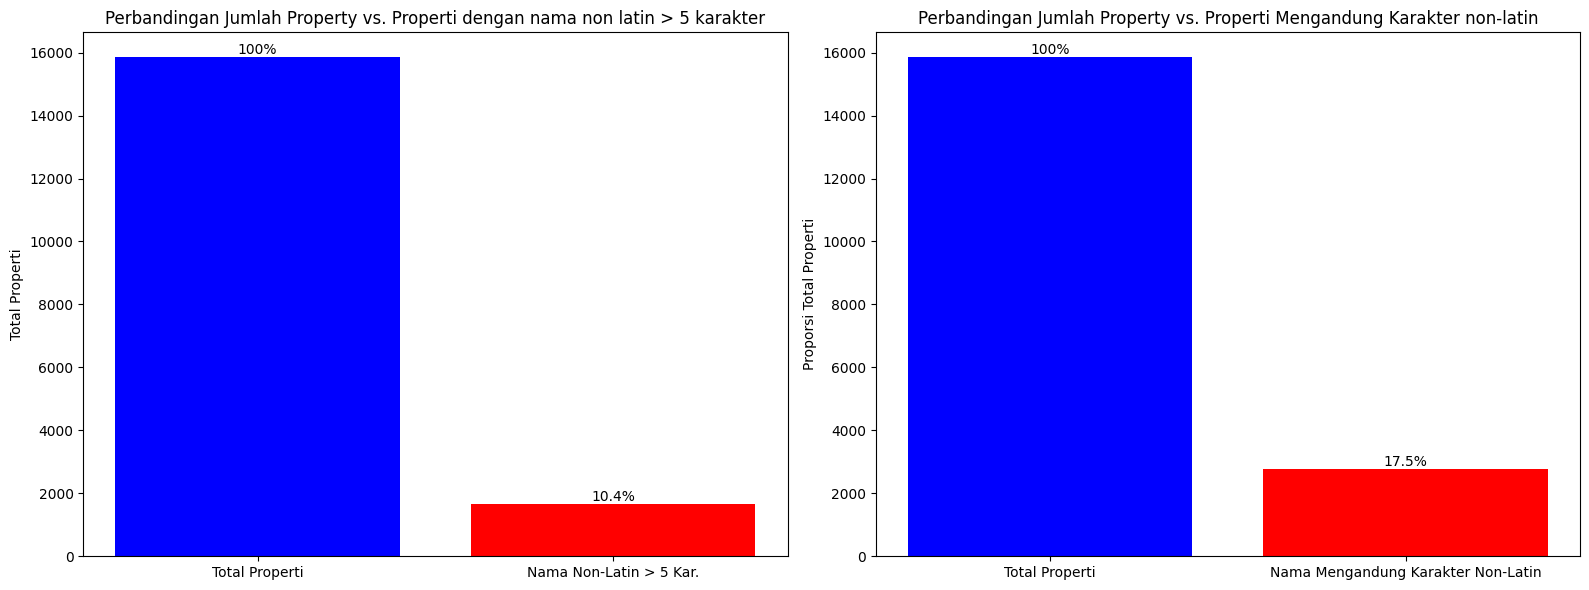

In [44]:
import matplotlib.pyplot as plt

# Menghitung proporsi 'properti > 100 hari' terhadap 'total properti'
proporsi_properti_lebih_dari_100_hari_1 = (nama_non_latin_5kar / len(df)) * 100
proporsi_total_properti_1 = 100

# Data untuk grafik 1
categories_1 = ['Total Properti', 'Nama Non-Latin > 5 Kar.']
values_1 = [len(df), nama_non_latin_5kar]
prop_with_review_1 = values_1[1] / values_1[0] * 100

# Menghitung proporsi 'properti > 100 hari' terhadap 'total properti'
proporsi_properti_lebih_dari_100_hari_2 = (jumlah_nama_non_latin / len(df)) * 100
proporsi_total_properti_2 = 100

# Data untuk grafik 2
categories_2 = ['Total Properti', 'Nama Mengandung Karakter Non-Latin']
values_2 = [len(df), jumlah_nama_non_latin]
prop_with_review_2 = values_2[1] / values_2[0] * 100

# Membuat subplot dengan 1 baris dan 2 kolom
plt.figure(figsize=(16, 6))

# Grafik 1
plt.subplot(1, 2, 1)
bars_1 = plt.bar(categories_1, values_1, color=['blue', 'red'])
for bar in bars_1:
    height = bar.get_height()
    if height == values_1[0]:
        label = '100%'
    else:
        label = f'{prop_with_review_1:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')
plt.ylabel('Total Properti')
plt.title('Perbandingan Jumlah Property vs. Properti dengan nama non latin > 5 karakter')

# Grafik 2
plt.subplot(1, 2, 2)
bars_2 = plt.bar(categories_2, values_2, color=['blue', 'red'])
for bar in bars_2:
    height = bar.get_height()
    if height == values_2[0]:
        label = '100%'
    else:
        label = f'{prop_with_review_2:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')
plt.ylabel('Proporsi Total Properti')
plt.title('Perbandingan Jumlah Property vs. Properti Mengandung Karakter non-latin')

plt.tight_layout()
plt.show()


#### 3.7. Analisa Review

Analisis terhadap review terutama dilakukan untuk melihat adakah indikasi review palsu terhadap properti yang disewakan.

Pemeriksaan meliputi:
1. Terdapat properti dengan jumlah ulasan yang rendah meskipun memiliki jumlah listing yang banyak.
2. Terdapat properti yang memiliki jumlah ulasan lebih besar dari jumlah penyewaan properti (calculated_host_listings_count), hal ini dapat diindikasi sebagai ulasan palsu dan mdapat membuat calon pengguna ragu.

In [45]:
# Menambahkan kolom baru yang merupakan hasil pengurangan antara 'calculated_host_listings_count' dan 'number_of_reviews'.
df['indikasi_fake_review'] = df['calculated_host_listings_count'] - df['number_of_reviews']

In [ ]:
# grafiknya kurang bagus
# fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# # Grafik pertama: nilai 'indikasi_fake_review' lebih dari 0
# axs[0].plot(df[df['indikasi_fake_review'] > 0].index, df[df['indikasi_fake_review'] > 0]['indikasi_fake_review'], marker='o', linestyle='-')
# axs[0].set_xlabel('Index')
# axs[0].set_ylabel('Jumlah Review < Count Listing')
# axs[0].set_title('Jumlah Review Lebih Kecil dari Jumlah Penyewaan Properti')
# axs[0].grid(True)

# # Grafik kedua: nilai 'indikasi_fake_review' kurang dari 0
# axs[1].plot(df[df['indikasi_fake_review'] < 0].index, df[df['indikasi_fake_review'] < 0]['indikasi_fake_review'], marker='o', linestyle='-', color='red')
# axs[1].set_xlabel('Index')
# axs[1].set_ylabel('Jumlah Review > Count Listing')
# axs[1].set_title('Jumlah Review Lebih Besar dari Jumlah Penyewaan Properti')
# axs[1].grid(True)

# plt.tight_layout()
# plt.show()

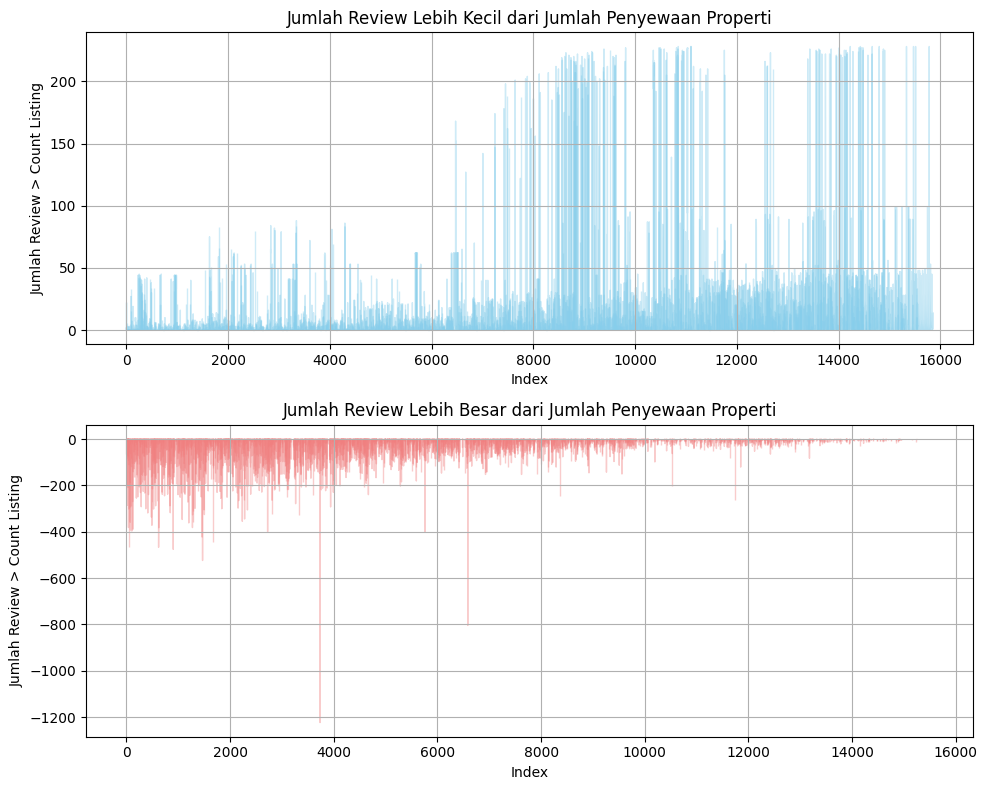

In [77]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Grafik pertama: nilai 'indikasi_fake_review' lebih dari 0
axs[0].fill_between(df.index, df['indikasi_fake_review'], where=(df['indikasi_fake_review'] > 0), color='skyblue', alpha=0.4)
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Jumlah Review > Count Listing')
axs[0].set_title('Jumlah Review Lebih Kecil dari Jumlah Penyewaan Properti')
axs[0].grid(True)

# Grafik kedua: nilai 'indikasi_fake_review' kurang dari 0
axs[1].fill_between(df.index, df['indikasi_fake_review'], where=(df['indikasi_fake_review'] < 0), color='lightcoral', alpha=0.4)
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Jumlah Review > Count Listing')
axs[1].set_title('Jumlah Review Lebih Besar dari Jumlah Penyewaan Properti')
axs[1].grid(True)

plt.tight_layout()
plt.show()

- Pada grafik pertama, banyaknya (kali) penyewaan yang tidak memiliki review terhadap tiap properti. Kurangnya review dibandingkan jumlah disewanya properti mencapai lebih dari 200 kali. Padahal review adalah faktor yang cukup penting bagi calon penyewa properti dalam memutuskan untuk penyewa properti tersebut atau tidak.
- Pada grafik kedua menunjukkan review yang lebih banyak dibandingkan banyaknya (kali) properti disewa. Hal ini dapat menimbulkan kecurigaan dan ketidakpercayaan calon penyewa properti terhadap properti ataupun ulasannya.

#### 3.8. Analisa Property terhadap Jumlah Review
**Proporsi jumlah setiap jenis properti vs Proporsi jumlah review berdasarkan jenis properti**

In [47]:
df_room=df['room_type'].value_counts()
df_room_type=df.groupby('room_type')[['number_of_reviews']].sum()

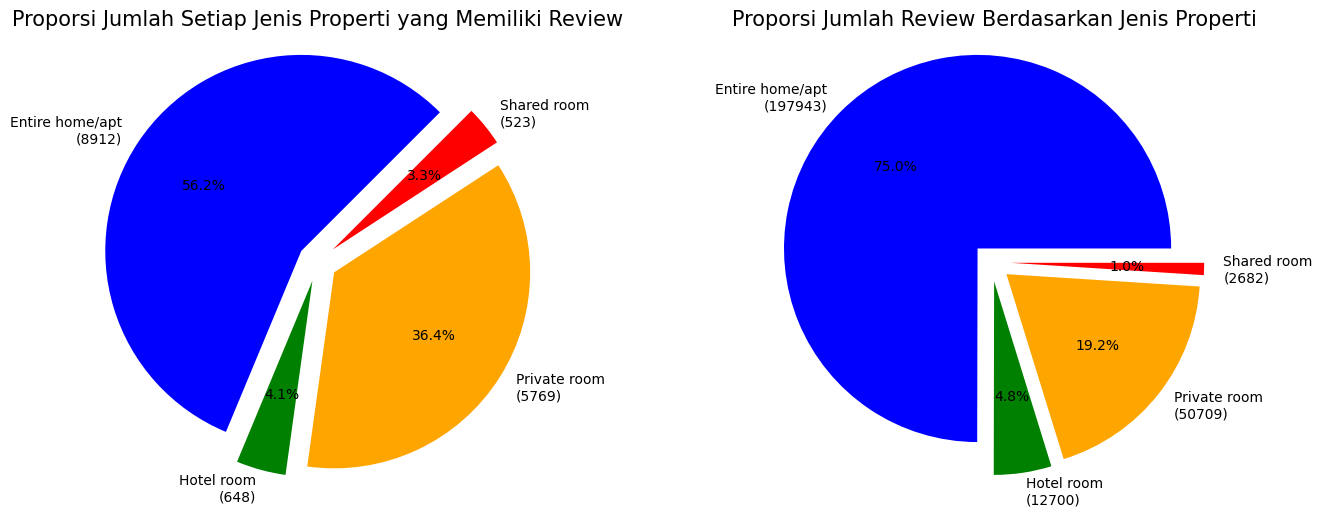

In [78]:
# Mengurutkan data berdasarkan kategori room_type
df_room_sorted = df_room.sort_index()
df_room_type_sorted = df_room_type.sort_index()

# Data untuk graph 1
explode_1 = (0.1, 0.1, 0.1, 0.1)
labels_1 = [f"{room_type}\n({count})" for room_type, count in zip(df_room_sorted.index, df_room_sorted)]
sizes_1 = df_room_sorted.values

# Data untuk graph 2
explode_2 = (0.1, 0.1, 0.1, 0.1)
labels_2 = [f"{number_of_reviews}\n({sum})" for number_of_reviews, sum in zip(df_room_type_sorted.index, df_room_type_sorted['number_of_reviews'])]
sizes_2 = df_room_type_sorted['number_of_reviews'].values

# Warna yang akan digunakan untuk setiap kategori
colors = ['blue', 'green', 'orange', 'red']

# Membuat subplot dengan 1 baris dan 2 kolom
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Grafik 1: Proportion of Room Types
axs[0].pie(sizes_1, labels=labels_1, autopct='%1.1f%%', explode=explode_1, startangle=45, colors=colors)
axs[0].set_title('Proporsi Jumlah Setiap Jenis Properti yang Memiliki Review', size=15)
axs[0].axis('equal')  # Memastikan lingkaran menjadi lingkaran

# Grafik 2: Proporsi Jumlah Review Berdasarkan Jenis Properti
axs[1].pie(sizes_2, labels=labels_2, autopct='%1.1f%%', explode=explode_2, colors=colors)
axs[1].set_title('Proporsi Jumlah Review Berdasarkan Jenis Properti', size=15)
axs[1].axis('equal')  # Memastikan lingkaran menjadi lingkaran

# Menampilkan plot
plt.show()


Dapat diamati bahwa jumlah properti tertinggi berada dalam kategori "Entire home/apt", dengan 8.912 properti dan 197.943 ulasan, menyumbang 75% dari total ulasan untuk semua properti. Namun, kategori "private room", dengan 36,4% properti dari jumlah keseluruhan properti pada AirBnB Bangkok memiliki 19,2% ulasan, dimana kategori "Hotel room" memiliki 4,1% properti dari jumlah keseluruhan properti dan memiliki 12.700 ulasan (4,8%).

Artinya, kategori "Private Room" memiliki 9 kali lebih banyak properti daripada kategori "Hotel room", tetapi memiliki 4 kali lebih banyak ulasan daripada kategori "Hotel room".

Dari fakta diatas kita bisa mencoba menemukan hubungan antara "number of reviews" dengan tipe properti dan katagori lainnya.

Analisis Ketersediaan Kamar dan Jumlah Review yang Diperoleh

In [52]:
df_apart=df[df['room_type']=='Entire home/apt']
df_private=df[df['room_type']=='Private room']
df_hotel=df[df['room_type']=='Hotel room']
df_shared=df[df['room_type']=='Shared room']

In [53]:
count_with_availability_P = df_private[df_private["availability_365"] != 0]["id"].count()
count_with_reviews_P = df_private[(df_private["availability_365"] != 0) & (df_private["number_of_reviews"] != 0)]["id"].count()

count_with_availability_A= df_apart[(df_apart["availability_365"]!=0)]["id"].count()
count_with_reviews_A = df_apart[(df_apart["availability_365"]!=0)&(df_apart["number_of_reviews"]!=0)]["id"].count()

count_with_availability_H= df_hotel[(df_hotel["availability_365"]!=0)]["id"].count()
count_with_reviews_H = df_hotel[(df_hotel["availability_365"]!=0)&(df_hotel["number_of_reviews"]!=0)]["id"].count()

count_with_availability_S= df_shared[(df_shared["availability_365"]!=0)]["id"].count()
count_with_reviews_S = df_shared[(df_shared["availability_365"]!=0)&(df_shared["number_of_reviews"]!=0)]["id"].count()

# Tabel Komparasi
comparison_table = pd.DataFrame({
    'Tipe Data': ['Properti yang bisa disewakan', 'Properti yang menerima review'],
    'Jumlah Properti-Private room': [count_with_availability_P, count_with_reviews_P],
    'Jumlah Properti-Entire home/apt': [count_with_availability_A, count_with_reviews_A],
    'Jumlah Properti-Hotel': [count_with_availability_H, count_with_reviews_H],
    'Jumlah Properti-Shared Room': [count_with_availability_S, count_with_reviews_S]
})

display(comparison_table)

,Tipe Data,Jumlah Properti-Private room,Jumlah Properti-Entire home/apt,Jumlah Properti-Hotel,Jumlah Properti-Shared Room
0,Properti yang bisa disewakan,5518,8404,567,507
1,Properti yang menerima review,2695,6180,390,197


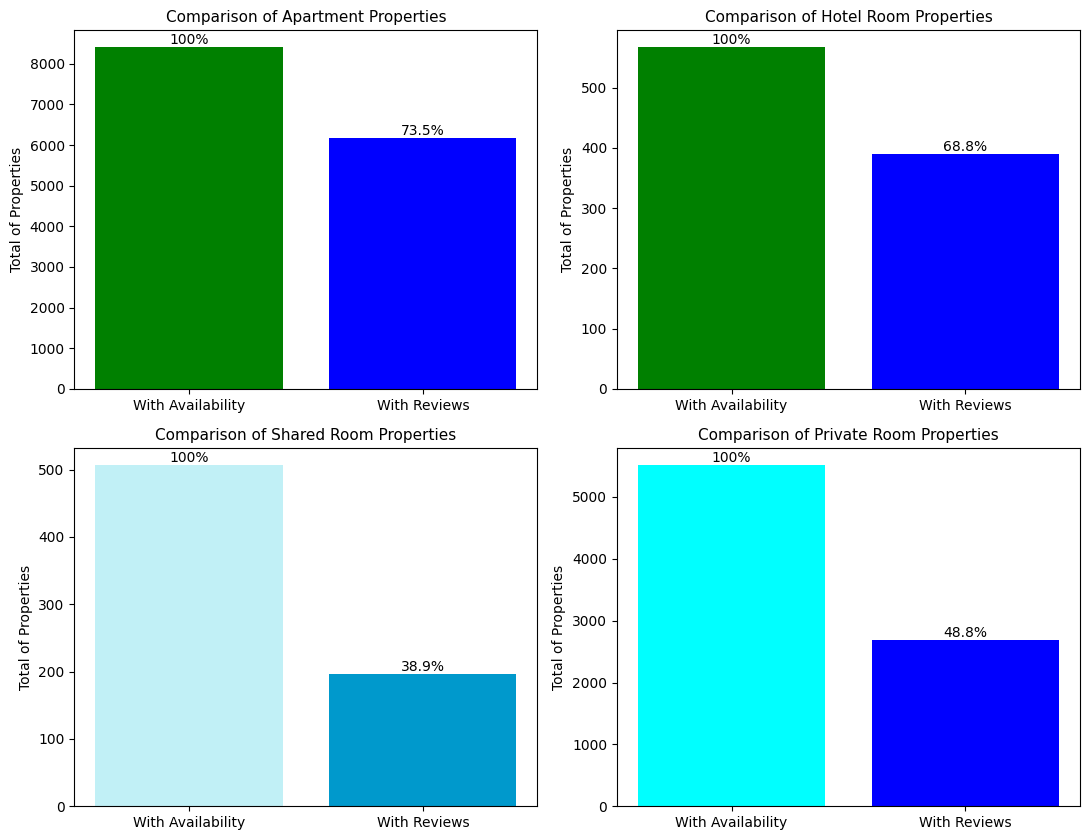

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8.5))

# Grafik 1
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_A, count_with_reviews_A]

plt.subplot(2, 2, 1)  # Creating the first subplot with 2 rows, 2 columns, and index 1.
bars = plt.bar(labels, counts, color=['green', 'blue'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Apartment Properties",size=11)
plt.ylabel("Total of Properties")

# Grafik 2
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_H, count_with_reviews_H]

plt.subplot(2, 2, 2)  # Creating the first subplot with 2 rows, 2 columns, and index 2.
bars = plt.bar(labels, counts, color=['green', 'blue'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Hotel Room Properties",size=11)
plt.ylabel("Total of Properties")

# Grafik 3
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_S, count_with_reviews_S]

plt.subplot(2, 2, 3)  # Creating the first subplot with 2 rows, 2 columns, and index 3.
bars = plt.bar(labels, counts, color=['#C1F0F6', '#0099CC'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Shared Room Properties",size=11)
plt.ylabel("Total of Properties")

# Grafik 4
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_P, count_with_reviews_P]

plt.subplot(2, 2, 4)  # Creating the first subplot with 2 rows, 2 columns, and index 4.
bars = plt.bar(labels, counts, color=['cyan', 'blue'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Private Room Properties",size=11)
plt.ylabel("Total of Properties")

plt.tight_layout()  # Adjusting the layout of the subplot.
plt.show()


In [76]:
count_without_availability_P = df_private[df_private["availability_365"] == 0]["id"].count()
count_with_reviews_P = df_private[(df_private["availability_365"] == 0) & (df_private["number_of_reviews"] != 0)]["id"].count()

count_without_availability_A= df_apart[(df_apart["availability_365"]== 0)]["id"].count()
count_with_reviews_A = df_apart[(df_apart["availability_365"]== 0)&(df_apart["number_of_reviews"]!=0)]["id"].count()

count_without_availability_H= df_hotel[(df_hotel["availability_365"]== 0)]["id"].count()
count_with_reviews_H = df_hotel[(df_hotel["availability_365"]== 0)&(df_hotel["number_of_reviews"]!=0)]["id"].count()

count_without_availability_S= df_shared[(df_shared["availability_365"]== 0)]["id"].count()
count_with_reviews_S = df_shared[(df_shared["availability_365"]== 0)&(df_shared["number_of_reviews"]!=0)]["id"].count()

# Tabel Komparasi
comparison_table = pd.DataFrame({
    'Tipe Data': ['Properti yang tidak bisa disewakan', 'Properti yang menerima review'],
    'Jumlah Properti-Private room': [count_without_availability_P, count_with_reviews_P],
    'Jumlah Properti-Entire home/apt': [count_without_availability_A, count_with_reviews_A],
    'Jumlah Properti-Hotel': [count_without_availability_H, count_with_reviews_H],
    'Jumlah Properti-Shared Room': [count_without_availability_S, count_with_reviews_S]
})

display(comparison_table)

,Tipe Data,Jumlah Properti-Private room,Jumlah Properti-Entire home/apt,Jumlah Properti-Hotel,Jumlah Properti-Shared Room
0,Properti yang tidak bisa disewakan,251,508,81,16
1,Properti yang menerima review,145,388,60,8


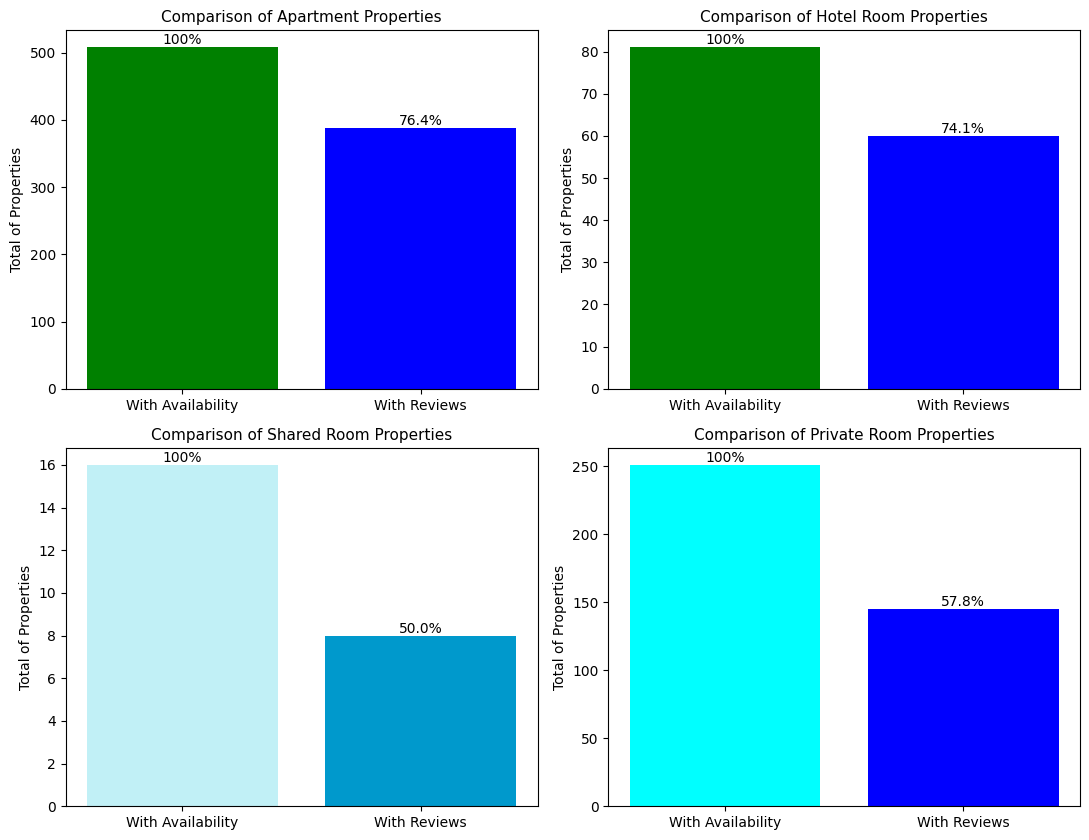

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8.5))

# Grafik 1
labels = ['With Availability', 'With Reviews']
counts = [count_without_availability_A, count_with_reviews_A]

plt.subplot(2, 2, 1)  # Creating the first subplot with 2 rows, 2 columns, and index 1.
bars = plt.bar(labels, counts, color=['green', 'blue'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Apartment Properties",size=11)
plt.ylabel("Total of Properties")

# Grafik 2
labels = ['With Availability', 'With Reviews']
counts = [count_without_availability_H, count_with_reviews_H]

plt.subplot(2, 2, 2)  # Creating the first subplot with 2 rows, 2 columns, and index 2.
bars = plt.bar(labels, counts, color=['green', 'blue'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Hotel Room Properties",size=11)
plt.ylabel("Total of Properties")

# Grafik 3
labels = ['With Availability', 'With Reviews']
counts = [count_without_availability_S, count_with_reviews_S]

plt.subplot(2, 2, 3)  # Creating the first subplot with 2 rows, 2 columns, and index 3.
bars = plt.bar(labels, counts, color=['#C1F0F6', '#0099CC'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Shared Room Properties",size=11)
plt.ylabel("Total of Properties")

# Grafik 4
labels = ['With Availability', 'With Reviews']
counts = [count_without_availability_P, count_with_reviews_P]

plt.subplot(2, 2, 4)  # Creating the first subplot with 2 rows, 2 columns, and index 4.
bars = plt.bar(labels, counts, color=['cyan', 'blue'])

# Menghitung proporsi total with review terhadap total with availability
prop_with_review = counts[1] / counts[0] * 100

# Menambahkan label persentase pada setiap bar
for bar in bars:
    height = bar.get_height()
    if height == counts[0]:
        label = '100%'
    else:
        label = f'{prop_with_review:.1f}%'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title("Comparison of Private Room Properties",size=11)
plt.ylabel("Total of Properties")


plt.tight_layout()  # Adjusting the layout of the subplot.
plt.show()


# 4. Kesimpulan

Berdasarkan hasil analisa diatas dapat disimpulkan terdapat beberapa permasalahan yang dapat menjadi faktor-faktor kurangnya kenyamanan atau kepuasan pengalaman calon penyewa properti di AirBnB.
1. Nama properti memiliki beberapa permasalahan seperti: properti tidak memiliki nama sama sekali dan nama sulit dipahami.
2. Terdapat banyak properti dalam aplikasi yang memiliki nama yang sama dengan lokasi, nama pemiliki, tipe ruangan dan harga yang sama.
3. Harga properti yang tidak masuk akal terutama overprice pada 'Privat room' yang notabennya adalah berbagi bangunan dengan pemilik.
4. Terdapat properti yang hanya disewakan dalam jangka waktu yang panjang.
5. Terdapat properti yang tidak disewakan sama sekali sepanjang tahun.
6. Terdapat ulasan pada properti yang tidak disewakan.




# 5. Rekomendasi

Permasalahan-permasalahan yang ditemukan dalam aplikasi AirBnB di Bangkok dapat ditangani agar dapat meningkatkan kepuasan pengguna aplikasi. Beberapa hal yang dapat diperbaiki adalah sebagai berikut:
- Kolom **Nama** pada formular pendaftaran properti untuk pertama kalinya harus diisi denngan beberapa syarat sebagai berikut: Nama harus memiliki minimal karakter (e.g. 5); Nama harus diisi dengan nama yang belum pernah didaftarkan sebelumnya (unique nama)'; Nama harus menggunakan Karakter Alfabet-Latin dan angka.
- Ketersediaan (availability days) untuk disewa tidak bisa 0 hari dalam setahun, (direkomendasikan untuk menetapkan minimal hari yang tersedia agar properti dapat didaftarkan).
- Minimal hari (Minimum stay) yang harus disewa oleh calon penyewa tidak tidak boleh lebih dari 1 bulan, karena AirBnB adalah penyewaan properti jangka pendek.
- Menghindari Duplikasi dengan cara mengharuskan unique name, menghindari properti disewakan 2 kali karena ada 2 properti terdaftar untuk 1 properti yang sama (duplicate)
- Melakukan pengecekan lebih mendalam menerima pengajuan listing, apakah sudah memenuhi standar atau tidak
- Memberikan reward kepada user yang memberikan review 
- Hanya user yang sudah menyewa suatu properti yang dapat memberi review terhadap properti yang sudah selesai disewa.
- Melakukan training untuk orang yang ingin menyewakan propertinya, agar pahan standar apa yang harus dipenuhi.
